In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = {
    "Transmission": ["Manual", "Automatic", "Manual", "Automatic"],
    "Color": ["Red", "Blue", "Green", "Red"],
    "Price": [500000, 700000, 550000, 720000]
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)
le = LabelEncoder()
df["Transmission"] = le.fit_transform(df["Transmission"])
df = pd.get_dummies(df, columns=["Color"], drop_first=True)
print("\nEncoded Data:")
print(df)

Original Data:
  Transmission  Color   Price
0       Manual    Red  500000
1    Automatic   Blue  700000
2       Manual  Green  550000
3    Automatic    Red  720000

Encoded Data:
   Transmission   Price  Color_Green  Color_Red
0             1  500000        False       True
1             0  700000        False      False
2             1  550000         True      False
3             0  720000        False       True


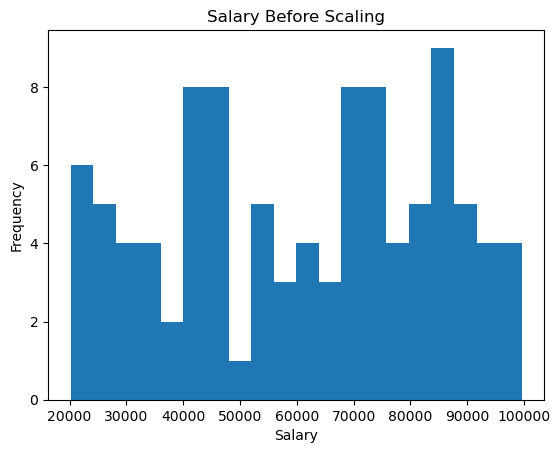

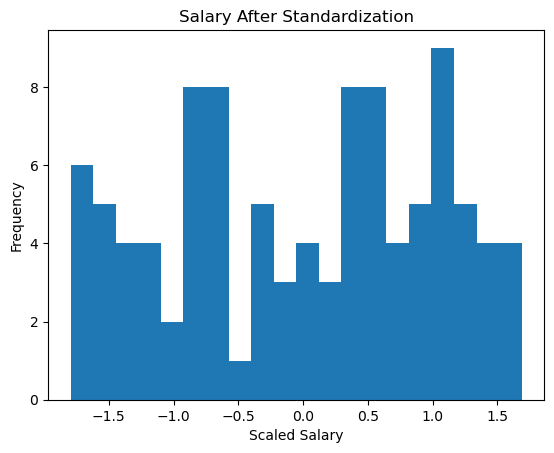

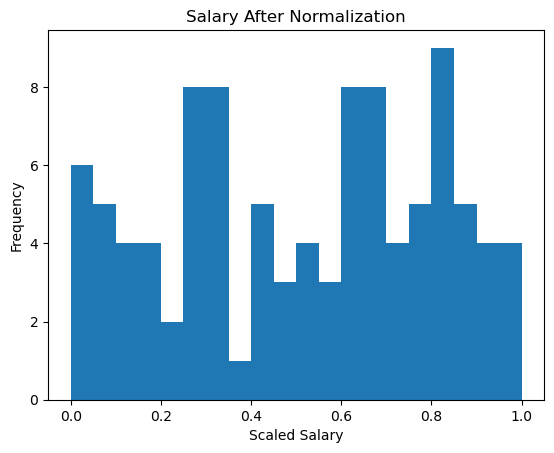

,Age,Salary
0,0.974359,0.441180
1,0.717949,0.972256
2,0.358974,1.000000
3,0.179487,0.795386
4,0.512821,0.135557


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
np.random.seed(42)
data = {
    "Age": np.random.randint(20, 60, 100),
    "Salary": np.random.randint(20000, 100000, 100)
}
df = pd.DataFrame(data)
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(
    scaler_standard.fit_transform(df),
    columns=df.columns
)
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler_minmax.fit_transform(df),
    columns=df.columns
)
plt.figure()
plt.hist(df["Salary"], bins=20)
plt.title("Salary Before Scaling")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()
plt.figure()
plt.hist(df_standardized["Salary"], bins=20)
plt.title("Salary After Standardization")
plt.xlabel("Scaled Salary")
plt.ylabel("Frequency")
plt.show()
plt.figure()
plt.hist(df_normalized["Salary"], bins=20)
plt.title("Salary After Normalization")
plt.xlabel("Scaled Salary")
plt.ylabel("Frequency")
plt.show()
df.head()
df_standardized.head()
df_normalized.head()

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = np.random.rand(200, 1) * 10
y = (X ** 2).ravel() + np.random.randn(200) * 5
df = pd.DataFrame({"Feature": X.ravel(), "Target": y})
X_train, X_test, y_train, y_test = train_test_split(
    df[["Feature"]], df["Target"], test_size=0.2, random_state=42
)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_linear = lin_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("R² score with original feature:", r2_linear)
print("R² score with polynomial features:", r2_poly)

if r2_poly > r2_linear:
    print("Polynomial features improved the model ✅")
else:
    print("Polynomial features did not help ❌")


R² score with original feature: 0.8956703488572102
R² score with polynomial features: 0.9692705504497603
Polynomial features improved the model ✅
